In [1]:
import matplotlib.pyplot as plt 

import pv_vision
from pv_vision.crack_analysis.crackcell import CrackCell
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# initialize CrackCell object
crackcell = CrackCell(img_path='../examples/crack_segmentation/img_for_crack_analysis/sample_raw.jpg', 
                      ann_path='../examples/crack_segmentation/img_for_crack_analysis/sample_ann.png',
                      crack_inx=3,
                      busbar_inx=4,
                      busbar_num=4)

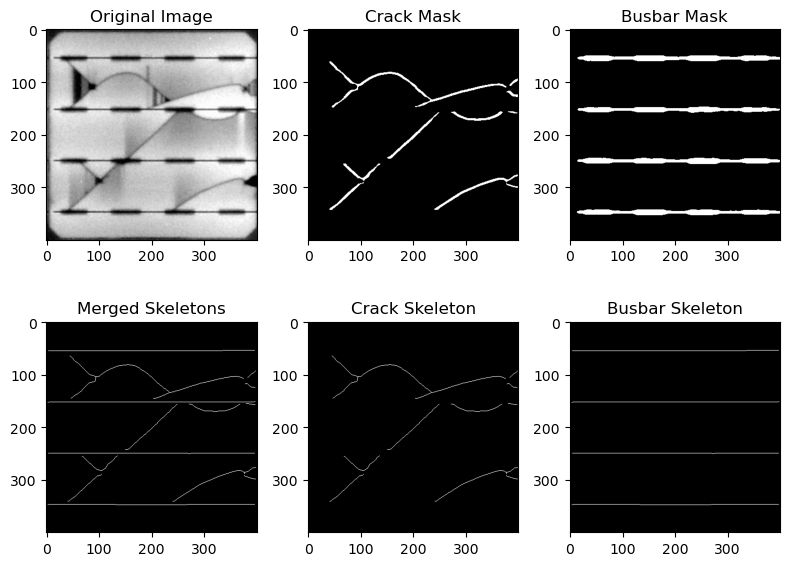

In [3]:
# visualize the masks and skeleton
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes[0, 0].imshow(crackcell.img, 'gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(crackcell.crack, 'gray')
axes[0, 1].set_title('Crack Mask')
axes[0, 2].imshow(crackcell.busbar, 'gray')
axes[0, 2].set_title('Busbar Mask')

axes[1, 0].imshow(crackcell.ske_merge, 'gray')
axes[1, 0].set_title('Merged Skeletons')
axes[1, 1].imshow(crackcell.ske_crack, 'gray')
axes[1, 1].set_title('Crack Skeleton')
axes[1, 2].imshow(crackcell.ske_busbar, 'gray')
axes[1, 2].set_title('Busbar Skeleton')

plt.tight_layout()


2.620625%


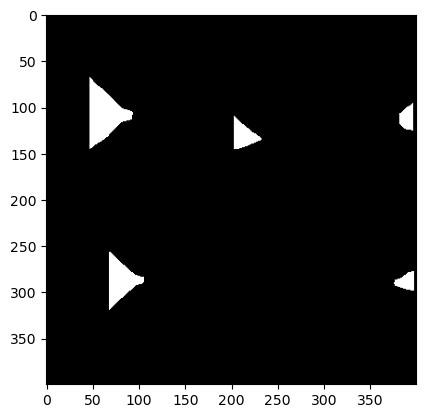

In [4]:
# extract inactive area
inactive_area, inactive_prop = crackcell.extract_inactive_area()
plt.imshow(inactive_area, "gray")
print("{}%".format(inactive_prop*100))

In [5]:
# extract crack length
crack_length = crackcell.extract_crack_length()
print("{} pixels".format(crack_length))

990 pixels


In [6]:
# extract brightness
# there are three modes
# 1. avg_all: average brightness of the whole image
# 2. avg_inactive: average brightness of the inactive area and treat the active area as 1
# 3. avg_inactive_only: average brightness of the inactive area only and return 1 for intact cells

brightness = crackcell.extract_brightness(mode='avg_inactive_only')
brightness

0.38002646801625495

In [7]:
# Or you can extract all features at once
crackcell.extract_features()

{'inactive_prop': 0.02620625,
 'crack_length': 990,
 'brightness_inactive_only': 0.38002646801625495}

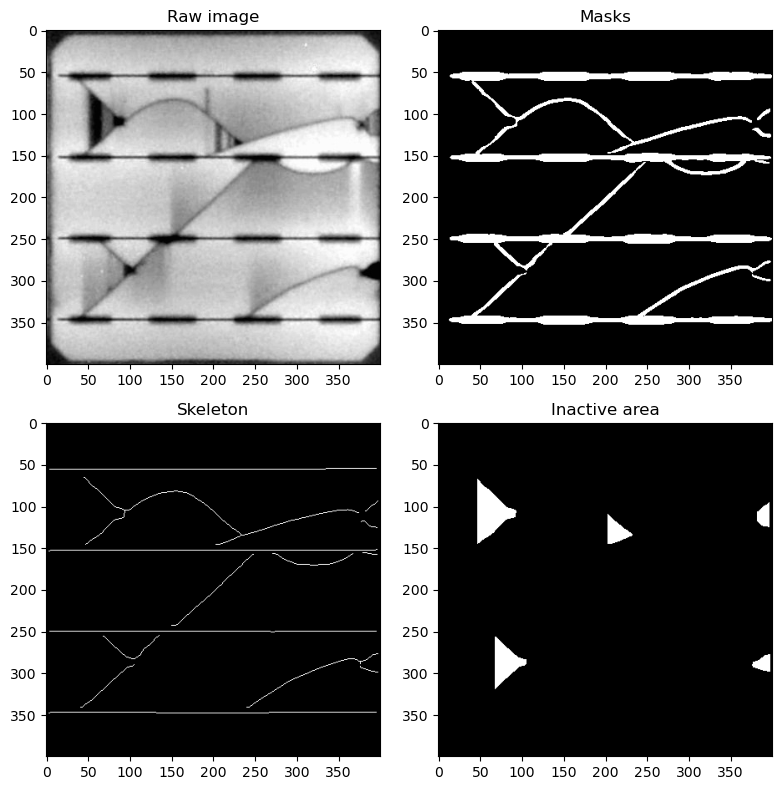

In [8]:
crackcell.plot()

# Done!